## 클래스 합침

In [1]:
import pandas as pd
import numpy as np

In [2]:
wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
dummy_data = pd.read_csv('./dummy.csv', header=None)

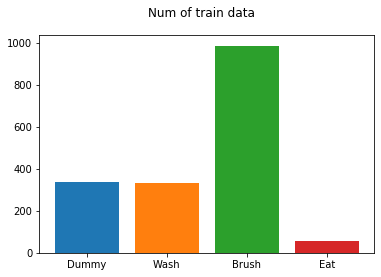

In [3]:
dummy_data[16] = 0
wash_data[16] = 1
brush_data[16] = 2
eat_data[16] = 3

dummy_arr = dummy_data.to_numpy()
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
eat_arr = eat_data.to_numpy()

import matplotlib.pyplot as plt

plt.bar(0, len(dummy_arr))
plt.bar(1, len(wash_arr))
plt.bar(2, len(brush_arr))
plt.bar(3, len(eat_arr))

plt.xticks((0, 1, 2, 3), ('Dummy', 'Wash', 'Brush', 'Eat'))
plt.suptitle('Num of train data')
plt.show() 

In [4]:
import sklearn
sampled_dummy = sklearn.utils.resample(dummy_arr, n_samples = 200, random_state = 42)
sampled_wash = sklearn.utils.resample(wash_arr, n_samples = 200, random_state = 42)
sampled_brush = sklearn.utils.resample(brush_arr, n_samples = 200, random_state = 42)
sampled_eat = sklearn.utils.resample(eat_arr, n_samples = 200, random_state = 42)

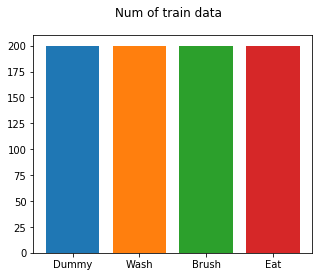

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.bar(0, len(sampled_dummy))
plt.bar(1, len(sampled_wash))
plt.bar(2, len(sampled_brush))
plt.bar(3, len(sampled_eat))

plt.xticks((0, 1, 2, 3), ('Dummy', 'Wash', 'Brush', 'Eat'))
plt.suptitle('Num of train data')
plt.show() 

In [6]:
tot_data = np.concatenate((sampled_dummy, sampled_wash, sampled_brush, sampled_eat))
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]

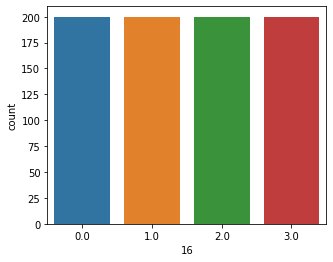

In [7]:
import seaborn as sns
plt.figure(figsize=(5, 4))
df = pd.DataFrame(tot_data)
sns.countplot(x = 16, data = df)

# visualization

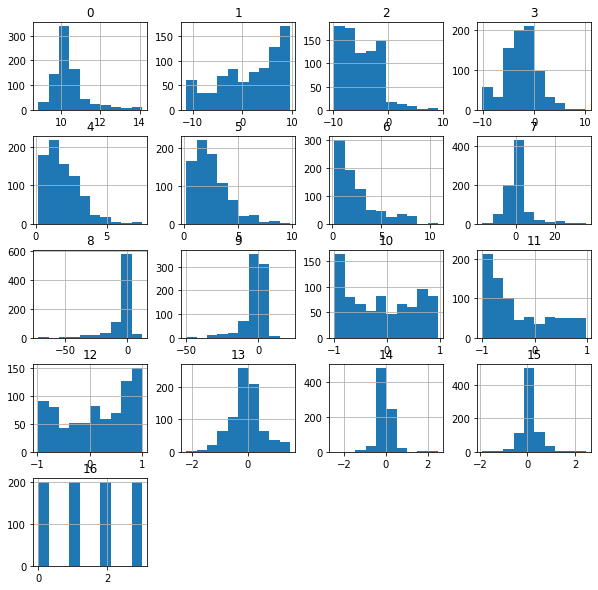

In [8]:
df[df.columns].hist(figsize=(10, 10))
plt.show()

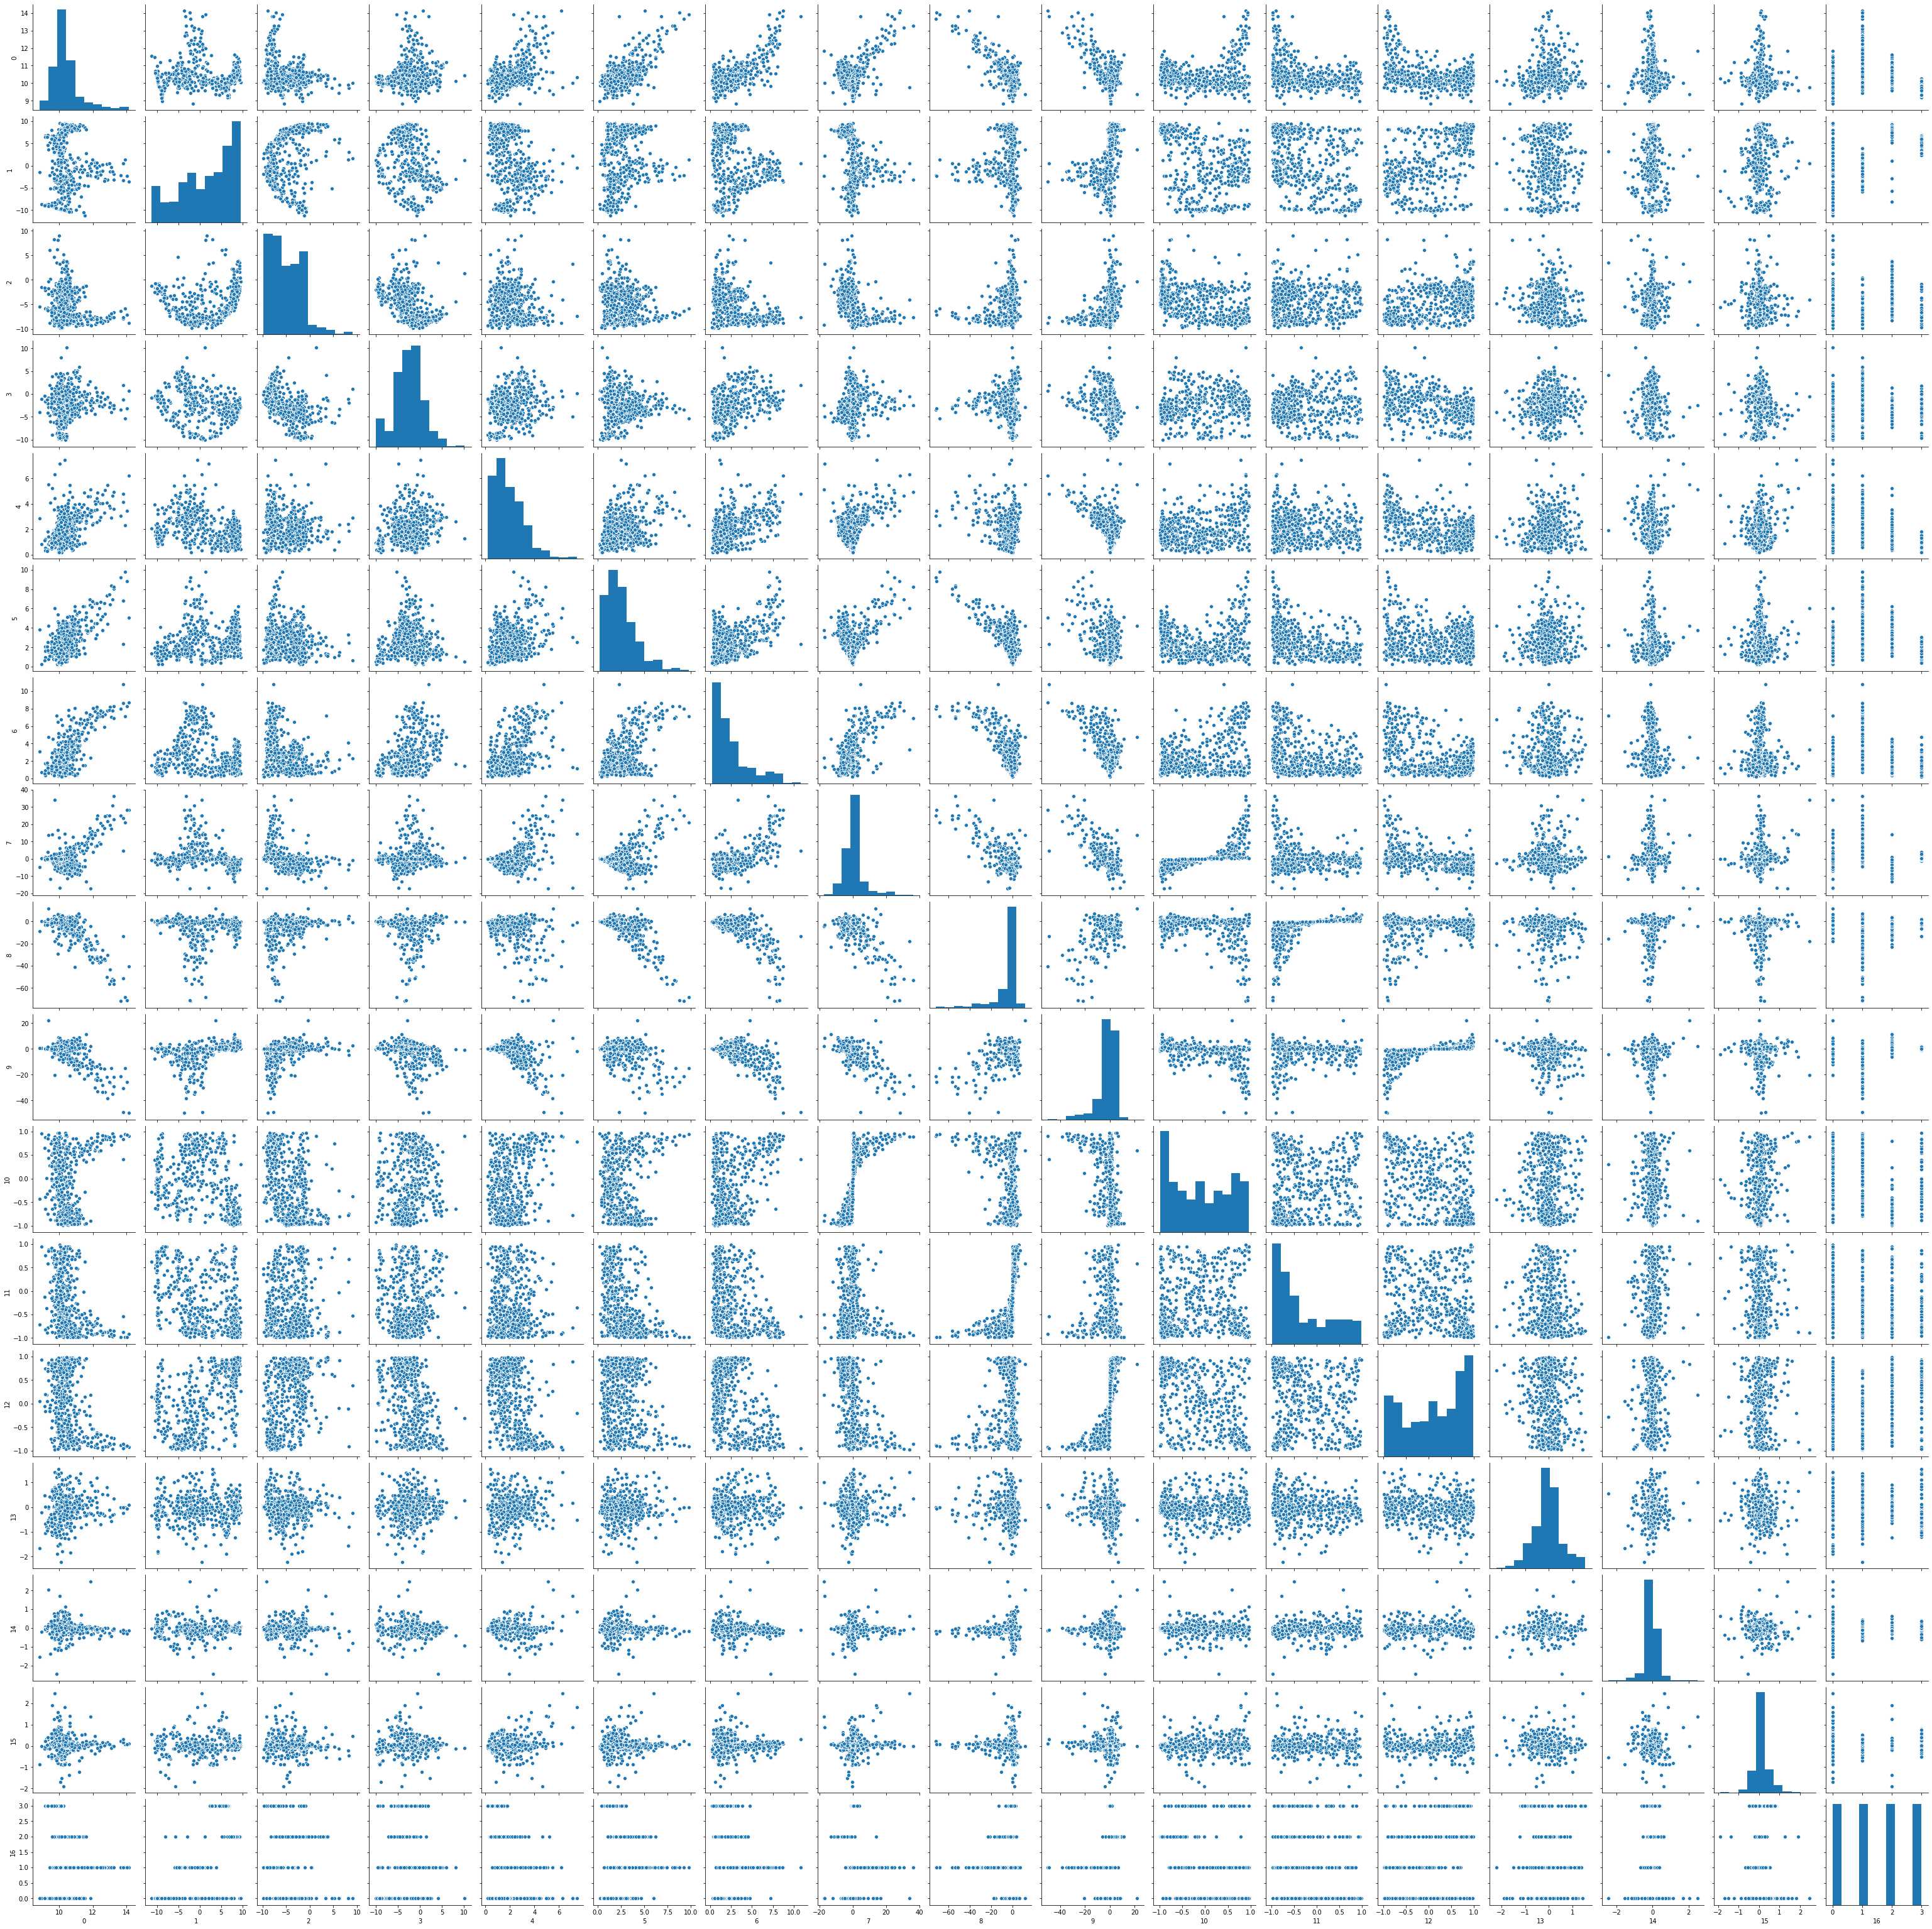

In [9]:
sns.pairplot(df)

# train

In [10]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm_clf_ = SVC(random_state=42, gamma = 0.01)
scores = cross_val_score(svm_clf_, train_x, train_y.flatten(), cv=skf)

In [12]:
print(scores)

[0.9625 0.925  0.95   0.95   0.925  0.9125 0.9375 0.9125 1.     0.95  ]


In [13]:
round(np.mean(scores), 2)

0.94

In [14]:
from sklearn.model_selection import cross_val_predict
svm_clf = SVC(random_state=42, gamma = 0.01)
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

In [15]:
class_names = ['dummy', 'wash', 'brush', 'eat']

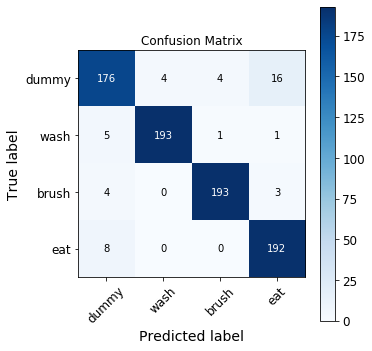

In [16]:
from sklearn.metrics import confusion_matrix

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(train_y.flatten(), y_train_pred)


plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)

thresh = cm.max() / 2.
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center', color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

In [17]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[271] = { 0 };
    double decisions[6] = { 0 };
    int votes[4] = { 0 };
        kernels[0] = compute_kernel(x,   9.57  , 7.99  , -4.65  , 1.22  , 1.27  , 1.09  , 1.57  , 1.08  , 1.45  , 1.85  , 0.78  , 0.85  , 0.93  , 0.64  , 0.1  , -0.56 );
        kernels[1] = compute_kernel(x,   9.48  , -5.21  , 0.24  , -6.07  , 4.06  , 3.32  , 1.43  , -11.74  , 0.97  , -0.19  , -0.87  , 0.2  , -0.03  , -0.74  , -1.36  , 0.12 );
        kernels[2] = compute_kernel(x,   9.65  , 6.01  , -6.45  , -2.02  , 1.9  , 2.32  , 2.51  , -0.8  , -2.99  , 3.2  , -0.18  ,